# GenCC data plots without any external API calls 

In [18]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Bio import Entrez

In [19]:
# Imports
#subm_summary = pd.read_csv("/mnt/c/Users/ashleyconard/Downloads/submission_summary.txt", sep="\t", skiprows=15, header=0)
#count = (~subm_summary['ExplanationOfInterpretation'].str.contains('-')).sum()

gencc_s = pd.read_csv("/home/azureuser/submissions-export-csv", header=0) # skiprows=15
out_dir = "/home/azureuser/gencc_summaries/"
gencc_s.shape


(21668, 30)

In [20]:
# Replace submitted_as_pmids column blank values with NaN
gencc_s['submitted_as_pmids'] = gencc_s['submitted_as_pmids'].replace('', np.nan)
    
# Remove rows where 'submitted_as_pmids' is NaN
gencc_s = gencc_s.dropna(subset=['submitted_as_pmids'])

# Replace all occurrences of 'LIMITED' with 'Limited' and 'Definitive ' with 'Definitive'
gencc_s['submitted_as_classification_name'] = gencc_s['submitted_as_classification_name'].replace({'LIMITED': 'Limited', 'Definitive ': 'Definitive', 'Modeare': 'Moderate', ' Moderate': 'Moderate', 'Moderate ': 'Moderate', 'Disputed evidence': 'Disputed Evidence', 'Disputed': 'Disputed Evidence', 'STRONG': 'Strong', 'Strong ': 'Strong', ' Strong': 'Strong'})

gencc_s.shape


(13907, 30)

In [21]:
# Split the 'submitted_as_pmids' column on ','
gencc_s['submitted_as_pmids'] = gencc_s['submitted_as_pmids'].str.split(',')

# Use explode to have each number appear on a separate row
gencc_s = gencc_s.explode('submitted_as_pmids').reset_index(drop=True)

# Remove rows with NaN or empty values in the "submitted_as_pmids" column
gencc_s = gencc_s.dropna(subset=['submitted_as_pmids'])
gencc_s['submitted_as_pmids'] = gencc_s['submitted_as_pmids'].str.replace(' ', '')

# Print the DataFrame
print(gencc_s.shape)

gencc_s.head()


(41557, 30)


,uuid,gene_curie,gene_symbol,disease_curie,disease_title,disease_original_curie,disease_original_title,classification_curie,classification_title,moi_curie,...,submitted_as_submitter_name,submitted_as_classification_id,submitted_as_classification_name,submitted_as_date,submitted_as_public_report_url,submitted_as_notes,submitted_as_pmids,submitted_as_assertion_criteria_url,submitted_as_submission_id,submitted_run_date
0,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,Genomics England PanelApp,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,24939586,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08
1,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,Genomics England PanelApp,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,25862627,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08
2,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,Genomics England PanelApp,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,27942422,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08
3,GENCC_000104-HGNC_1097-OMIM_613707-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013380,LEOPARD syndrome 3,OMIM:613707,LEOPARD syndrome 3,GENCC:100002,Strong,HP:0000006,...,Genomics England PanelApp,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,19206169,NaN,000104.pa48.v1.73.hgnc1097.m1.p1,2020-10-08
4,GENCC_000104-HGNC_1097-OMIM_613707-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013380,LEOPARD syndrome 3,OMIM:613707,LEOPARD syndrome 3,GENCC:100002,Strong,HP:0000006,...,Genomics England PanelApp,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,21396583,NaN,000104.pa48.v1.73.hgnc1097.m1.p1,2020-10-08


Mann-Whitney U test between Limited and Supportive: U=1262164.0, p=1.826858263069133e-50
Mann-Whitney U test between Limited and Strong: U=1620214.5, p=1.4321727042282053e-18
Mann-Whitney U test between Limited and No Known Disease Relationship: U=74160.0, p=0.007794790987614445
Mann-Whitney U test between Limited and Definitive: U=146805.5, p=0.04174999039402178
Mann-Whitney U test between Limited and Moderate: U=105204.5, p=0.006664491277684817
Mann-Whitney U test between Limited and Disputed Evidence: U=5868.5, p=0.39198547610605916
Mann-Whitney U test between Supportive and Strong: U=6675424.5, p=4.989885556398355e-34
Mann-Whitney U test between Supportive and No Known Disease Relationship: U=292800.0, p=8.317463613264101e-13
Mann-Whitney U test between Supportive and Definitive: U=590249.0, p=1.3186275069553233e-12
Mann-Whitney U test between Supportive and Moderate: U=416550.0, p=6.18400441690906e-17
Mann-Whitney U test between Supportive and Disputed Evidence: U=23149.5, p=0.037

/tmp/ipykernel_373855/227002174.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='submitted_as_classification_name', y='unique_disease_count', data=grouped_df, palette=color_dict, order=color_dict.keys(), inner=None)


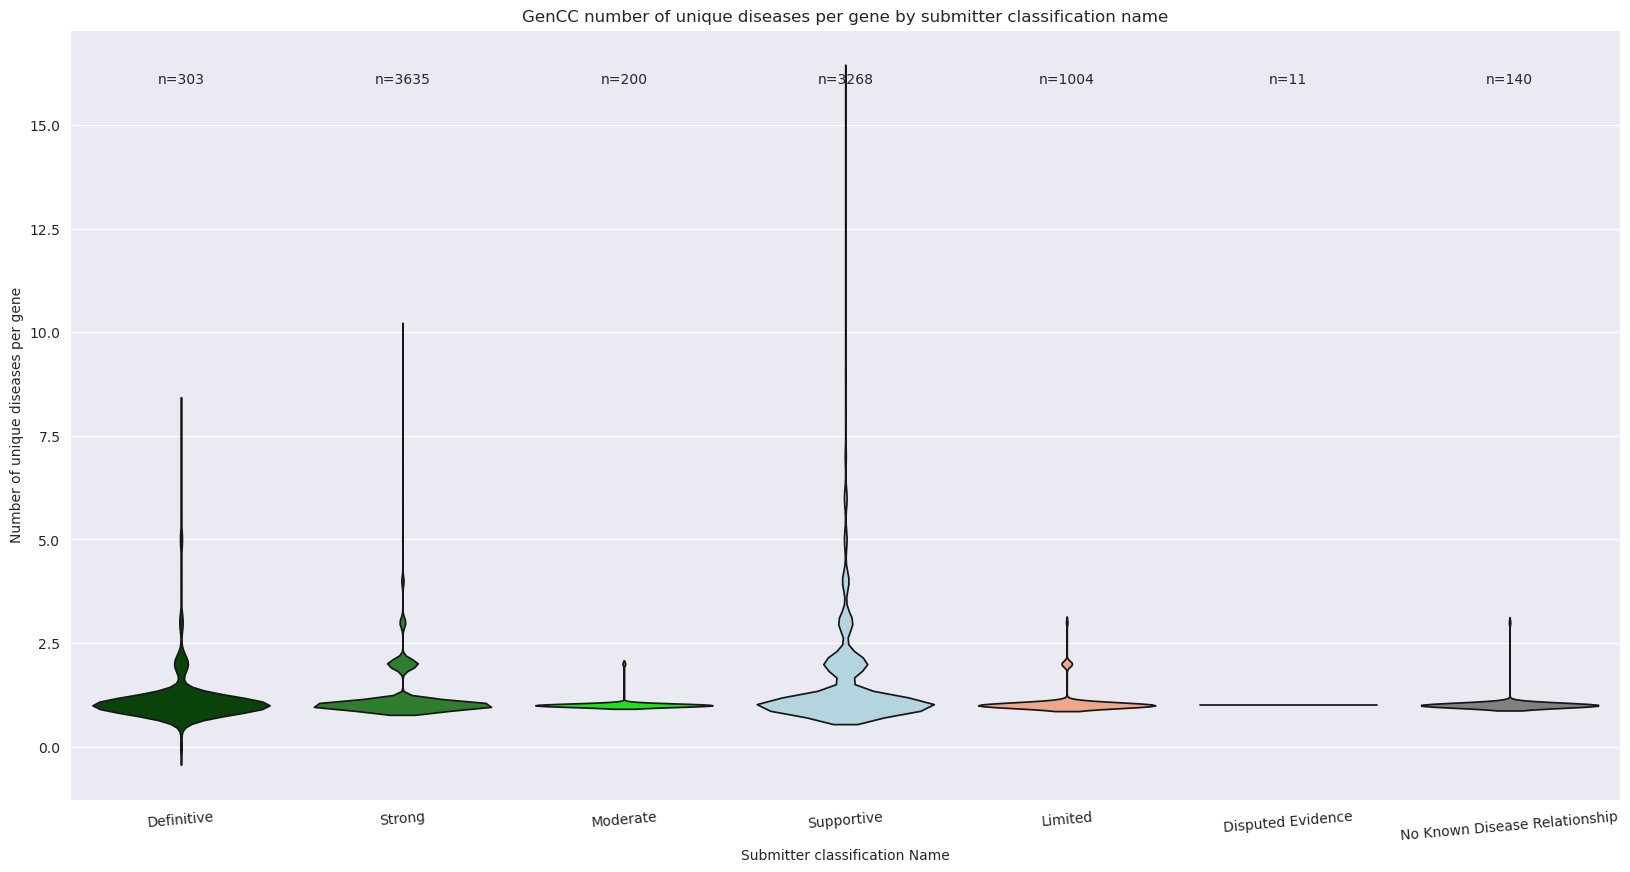

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

sns.set_style("darkgrid")

# Define color scheme
color_dict = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey'
}

# Group by 'gene_symbol' and 'submitted_as_classification_name', and count unique 'disease_title'
grouped_df = gencc_s.groupby(['gene_symbol', 'submitted_as_classification_name'])['disease_title'].nunique().reset_index(name='unique_disease_count')

# Convert 'submitted_as_classification_name' to Categorical and specify the order of the categories
grouped_df['submitted_as_classification_name'] = pd.Categorical(grouped_df['submitted_as_classification_name'], categories=color_dict.keys(), ordered=True)

# Calculate Mann-Whitney U test for each pair of distributions
classifications = list(grouped_df['submitted_as_classification_name'].unique())
significant_pairs = []
for i in range(len(classifications)):
    for j in range(i+1, len(classifications)):
        data1 = grouped_df[grouped_df['submitted_as_classification_name'] == classifications[i]]['unique_disease_count']
        data2 = grouped_df[grouped_df['submitted_as_classification_name'] == classifications[j]]['unique_disease_count']
        stat, p = mannwhitneyu(data1, data2)
        print(f'Mann-Whitney U test between {classifications[i]} and {classifications[j]}: U={stat}, p={p}')
        if p < 0.05:
            significant_pairs.append((classifications[i], classifications[j]))

# Create violin plot
plt.figure(figsize=(15, 15)) # 20, 10 without significant pairs
sns.violinplot(x='submitted_as_classification_name', y='unique_disease_count', data=grouped_df, palette=color_dict, order=color_dict.keys(), inner=None)

# Add count of data points for each violin
counts = grouped_df['submitted_as_classification_name'].value_counts().sort_index()
for i, count in enumerate(counts):
    plt.text(i, grouped_df['unique_disease_count'].max(), f'n={count}', ha='center')  # adjust y-coordinate as needed

plt.xticks(rotation=5)
plt.xlabel('Submitter classification Name')
plt.ylabel('Number of unique diseases per gene')
plt.title("GenCC number of unique diseases per gene by submitter classification name")

# Add lines for significant pairs
y_max = grouped_df['unique_disease_count'].max() + 10  # adjust y-coordinate as needed
for i, pair in enumerate(significant_pairs):
    x1 = classifications.index(pair[0])
    x2 = classifications.index(pair[1])
    y = y_max + i*5  # adjust these values as needed
    plt.plot([x1, x2], [y, y], color='black')
    plt.text((x1+x2)*0.5, y, '*', ha='center')
    
plt.show()

In [63]:
grouped_df[grouped_df['submitted_as_classification_name'] == 'Disputed Evidence']

,gene_symbol,submitted_as_classification_name,unique_disease_count
1291,CEP250,Disputed Evidence,1
1545,CNTN4,Disputed Evidence,1
2456,EPHA4,Disputed Evidence,1
2850,FREM1,Disputed Evidence,1
3415,HFM1,Disputed Evidence,1
5147,NODAL,Disputed Evidence,1
6338,RIMS1,Disputed Evidence,1
6569,SAMHD1,Disputed Evidence,1
7259,SPIDR,Disputed Evidence,1
7583,TDP1,Disputed Evidence,1


In [66]:
grouped_df['submitted_as_classification_name'].value_counts().sort_index()

submitted_as_classification_name
Definitive                        303
Disputed Evidence                  11
Limited                          1004
Moderate                          200
No Known Disease Relationship     140
Strong                           3635
Supportive                       3268
Name: count, dtype: int64

In [67]:
pd.Categorical(grouped_df['submitted_as_classification_name'], categories=color_dict.keys(), ordered=True)

['Limited', 'Supportive', 'Strong', 'Supportive', 'No Known Disease Relationship', ..., 'Supportive', 'Limited', 'Strong', 'Supportive', 'Strong']
Length: 8561
Categories (7, object): ['Definitive' < 'Strong' < 'Moderate' < 'Supportive' < 'Limited' < 'Disputed Evidence' < 'No Known Disease Relationship']

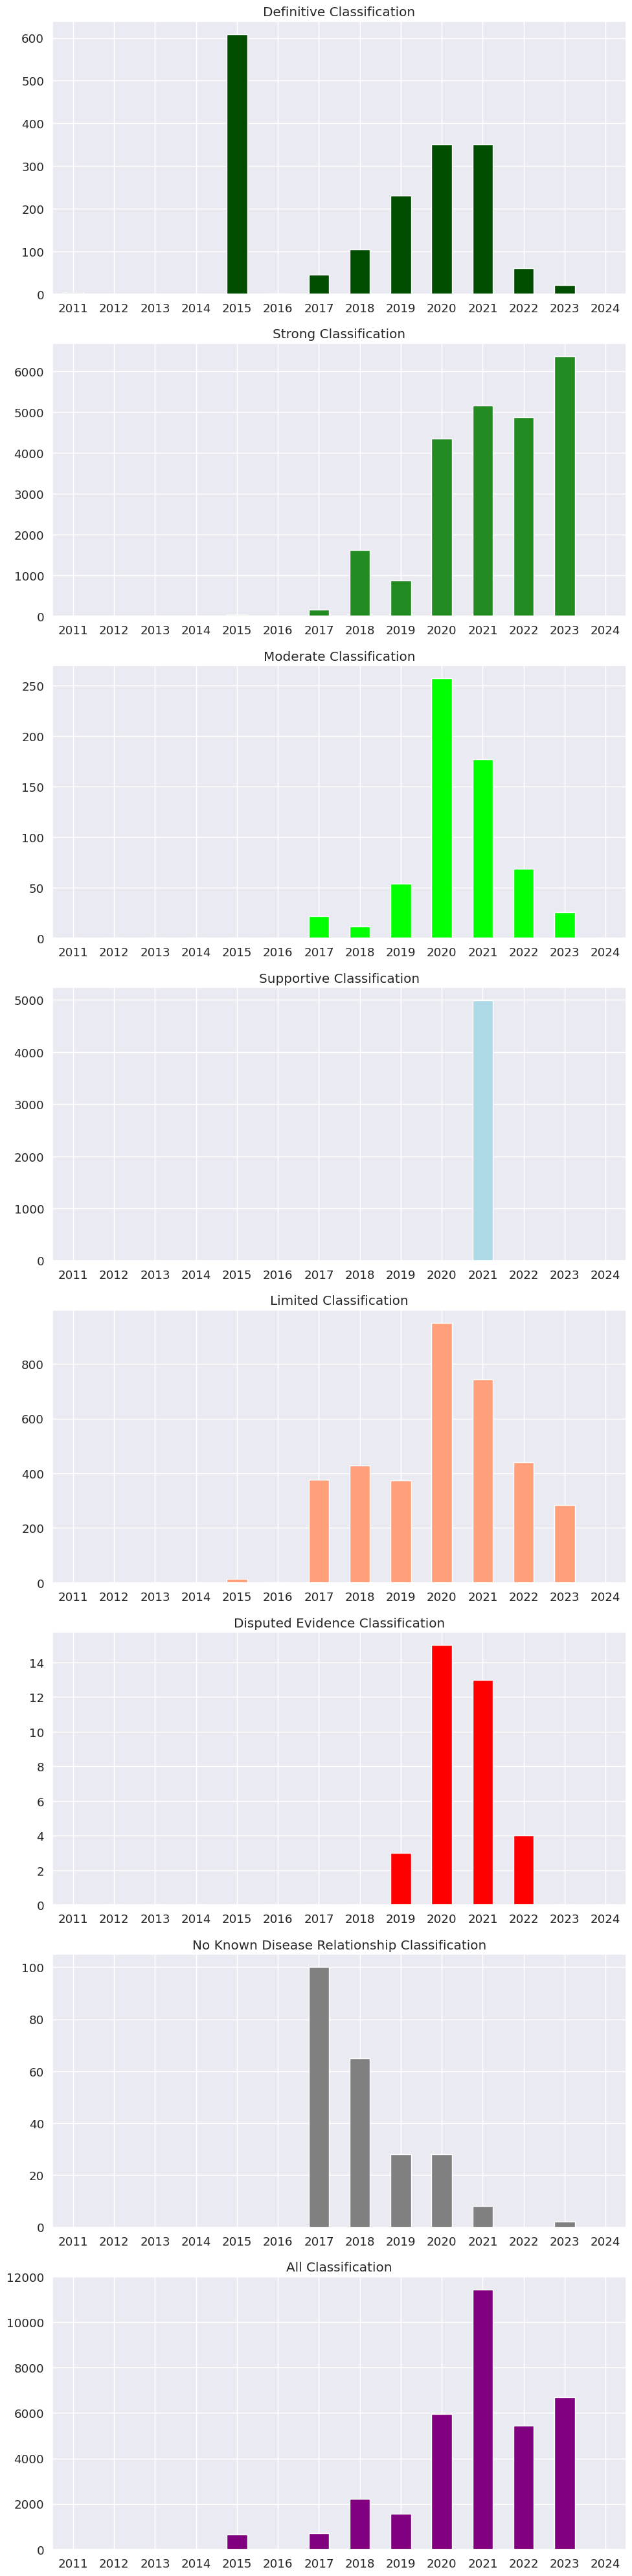

In [121]:
# GenCC frequency of classifications over time (i.e. years)

# Convert 'submitted_as_date' to datetime and extract the year
gencc_s['submitted_as_date'] = pd.to_datetime(gencc_s['submitted_as_date'])
gencc_s['submitted_year'] = gencc_s['submitted_as_date'].dt.year

# Create a range of years from 2011 to 2024
years = pd.RangeIndex(2011, 2025)

# Remove rows with 'NaN' in 'submitted_as_classification_name' column
gencc_s = gencc_s.dropna(subset=['submitted_as_classification_name'])

# Create a color dictionary
color_dict = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey'
}

# Create a figure with a subplot for each classification in color_dict plus one for all classifications
fig, axs = plt.subplots(len(color_dict) + 1, 1, figsize=(10, 5*(len(color_dict)+1)))

# Plot a bar plot of the year for each classification in color_dict
for i, classification in enumerate(list(color_dict.keys()) + ['All']):
    if classification == 'All':
        classification_df = gencc_s
        color = 'purple'  # Choose a color for the 'All' category
    else:
        classification_df = gencc_s[gencc_s['submitted_as_classification_name'] == classification]
        color = color_dict.get(classification, 'grey')  # Use color from dictionary if it exists, else use 'grey'
    
    classification_df['submitted_year'].value_counts().reindex(years, fill_value=0).sort_index().plot.bar(ax=axs[i], color=color)
    axs[i].set_title(f'{classification} Classification')
    axs[i].set_xticklabels(years, rotation=0)  # Set x-axis tick rotation

plt.tight_layout()
plt.show()

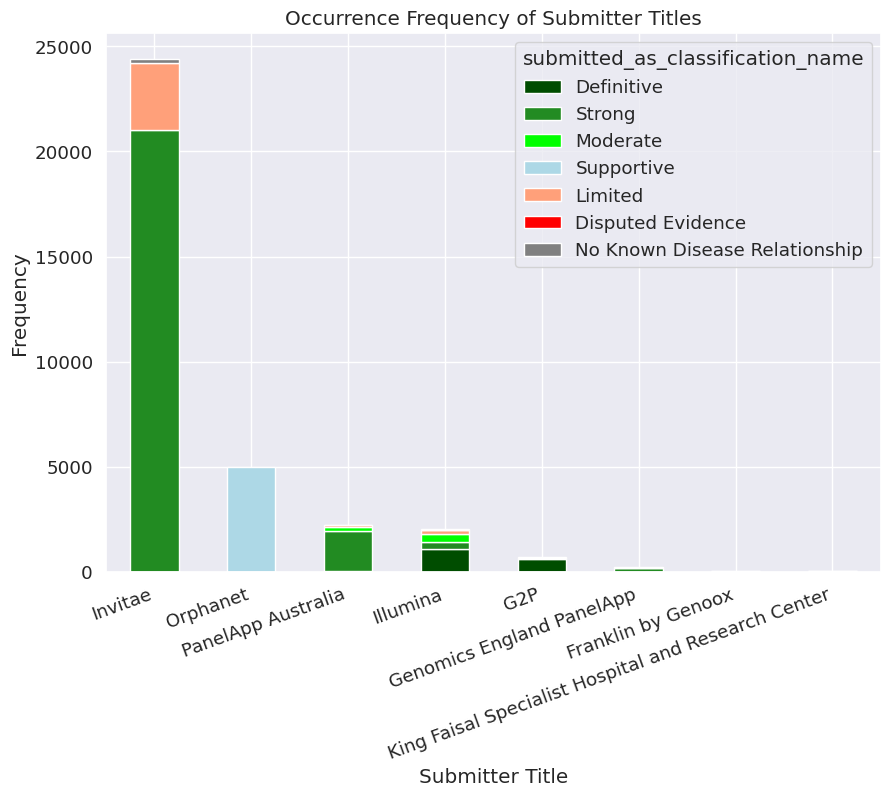

In [135]:
# Classification frequency by submitter title (all classifications)

# Create a color dictionary
color_dict = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey'
}

# Group by 'submitter_title' and 'submitted_as_classification_name', count the size, unstack and fill NaN with 0
grouped_df = gencc_s.groupby(['submitter_title', 'submitted_as_classification_name']).size().unstack(fill_value=0)

# Sort the columns based on the order in color_dict
grouped_df = grouped_df[list(color_dict.keys())]

# Add a total column
grouped_df['Total'] = grouped_df.sum(axis=1)

# Sort by the total column in descending order
grouped_df = grouped_df.sort_values('Total', ascending=False)

# Remove the total column
grouped_df = grouped_df.drop(columns='Total')

# Plot a stacked bar plot with the colors from color_dict
grouped_df.plot(kind='bar', stacked=True, color=list(color_dict.values()), figsize=(10, 7))

plt.title('Occurrence Frequency of Submitter Titles')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.xticks(rotation=20, ha='right')
# REMOVE HERE FOR FULL PLOT
#plt.ylim(0, 300)
# remove legend
#plt.legend().remove()
plt.show()

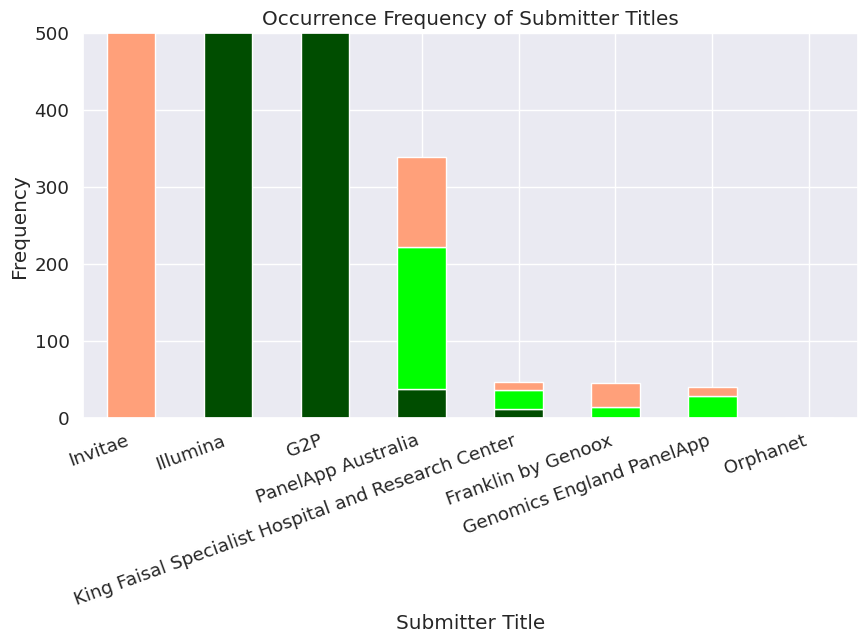

In [140]:
# Classification frequency by submitter title (definitive, moderate, limited classifications)
color_dict = {
    'Definitive': (0, 0.3, 0),
    'Moderate': (0, 1, 0),
    'Limited': 'lightsalmon'
}

# Group by 'submitter_title' and 'submitted_as_classification_name', count the size, unstack and fill NaN with 0
grouped_df = gencc_s.groupby(['submitter_title', 'submitted_as_classification_name']).size().unstack(fill_value=0)

# Filter the DataFrame to only include the columns in color_dict
grouped_df = grouped_df[list(color_dict.keys())]

# Add a total column
grouped_df['Total'] = grouped_df.sum(axis=1)

# Sort by the total column in descending order
grouped_df = grouped_df.sort_values('Total', ascending=False)

# Remove the total column
grouped_df = grouped_df.drop(columns='Total')

# Plot a stacked bar plot with the colors from color_dict
grouped_df.plot(kind='bar', stacked=True, color=list(color_dict.values()), figsize=(10, 5))

plt.title('Occurrence Frequency of Submitter Titles')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.xticks(rotation=20, ha='right')
# REMOVE HERE FOR FULL PLOT
plt.ylim(0, 500)
# remove legend
plt.legend().remove()
plt.show()

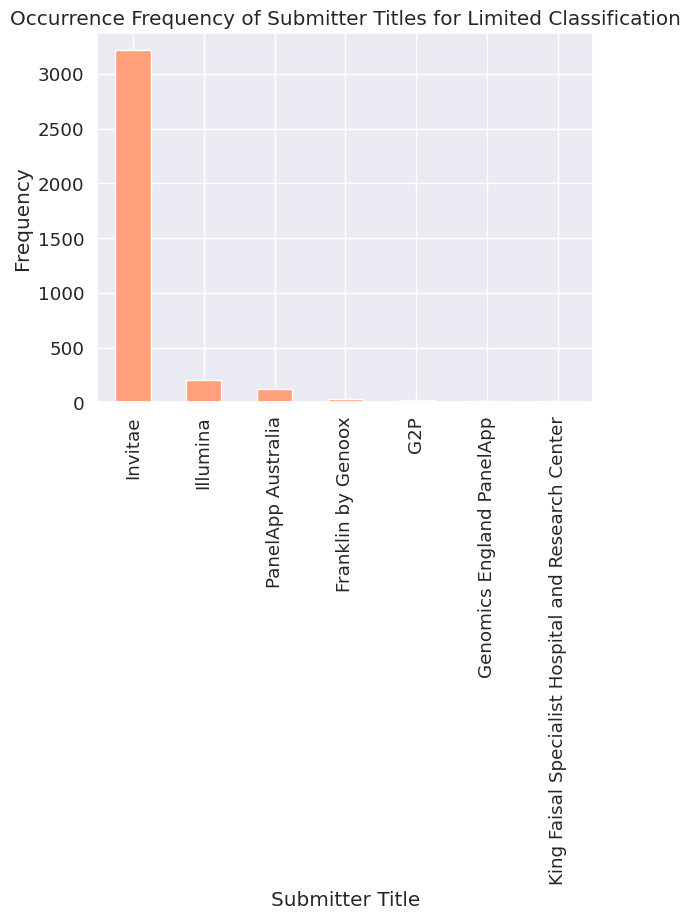

In [145]:
# Classification frequency by submitter title (one classification)

filtered_df = gencc_s[gencc_s['submitted_as_classification_name'].isin(['Limited'])]

filtered_df['submitter_title'].value_counts().plot(kind='bar', color="lightsalmon")

plt.title('Occurrence Frequency of Submitter Titles for Limited Classification')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.show()

# Create additional publication year column (by calling Entrez API)

In [6]:
def get_pub_year(pmid):
    if not pmid:
        return "PMID is empty or null"
    Entrez.email = "ashleyconard@microsoft.com"  # Always tell NCBI who you are
    handle = Entrez.efetch(db="pubmed", id=pmid, retmode="xml", rettype="abstract")
    records = Entrez.read(handle)
    if records and 'PubmedArticle' in records and records['PubmedArticle']:
        pubmed_article = records['PubmedArticle'][0]
        if 'PubmedData' in pubmed_article and 'History' in pubmed_article['PubmedData'] and pubmed_article['PubmedData']['History']:
            return pubmed_article['PubmedData']['History'][-1]['Year']
        else:
            return "No history found for this PMID"
    else:
        return "No records found for this PMID"
    
pmid = "24939586" 
print(get_pub_year(pmid))

# Example records['PubmedArticle'][0]['PubmedData']['History']

#history_pubmed = [DictElement({'Year': '2016', 'Month': '6', 'Day': '17'}, attributes={'PubStatus': 'received'}), DictElement({'Year': '2017', 'Month': '1', 'Day': '16'}, attributes={'PubStatus': 'accepted'}), DictElement({'Year': '2017', 'Month': '1', 'Day': '21', 'Hour': '6', 'Minute': '0'}, attributes={'PubStatus': 'pubmed'}), DictElement({'Year': '2017', 'Month': '7', 'Day': '1', 'Hour': '6', 'Minute': '0'}, attributes={'PubStatus': 'medline'}), DictElement({'Year': '2017', 'Month': '1', 'Day': '21', 'Hour': '6', 'Minute': '0'}, attributes={'PubStatus': 'entrez'})]


2015


In [24]:
import time

# Assuming gencc_s is your DataFrame
chunk_size = 50
chuck_enumeration = 3 # the next chunck_{i}.csv will start with this number
start_row = 5500  # 0-indexed, so 150 corresponds to the 151st row
chunks = [gencc_s[i:i+chunk_size] for i in range(start_row, gencc_s.shape[0], chunk_size)]

for i, chunk in enumerate(chunks, start=start_row//chunk_size):
    print("Chunk", i+chuck_enumeration)
    print(chunk['uuid'])
    chunk['pub_year'] = chunk['submitted_as_pmids'].apply(get_pub_year)
    
    # Save the chunk to a CSV file
    chunk.to_csv(f'chunk_{i+chuck_enumeration}.csv', index=False)
    
    # Sleep for a while to avoid hitting the server too frequently
    time.sleep(10)

# Concatenate all chunks
gencc_s = pd.concat([pd.read_csv(f'chunk_{i+chuck_enumeration}.csv') for i in range(start_row//chunk_size, len(chunks) + start_row//chunk_size)])

# Save the final DataFrame
gencc_s.to_csv('final.csv', index=False)

Chunk 113
5500    GENCC_000112-HGNC_12592-OMIM_263700-HP_0000007...
5501    GENCC_000112-HGNC_12592-OMIM_263700-HP_0000007...
5502    GENCC_000112-HGNC_12592-OMIM_263700-HP_0000007...
5503    GENCC_000112-HGNC_12592-OMIM_263700-HP_0000007...
5504    GENCC_000112-HGNC_12592-OMIM_263700-HP_0000007...
5505    GENCC_000112-HGNC_12592-OMIM_263700-HP_0000007...
5506    GENCC_000112-HGNC_5273-OMIM_224410-HP_0000007-...
5507    GENCC_000112-HGNC_5273-OMIM_224410-HP_0000007-...
5508    GENCC_000112-HGNC_5273-OMIM_224410-HP_0000007-...
5509    GENCC_000112-HGNC_14295-OMIM_613436-HP_0000006...
5510    GENCC_000112-HGNC_7720-OMIM_256030-HP_0000007-...
5511    GENCC_000112-HGNC_7720-OMIM_256030-HP_0000007-...
5512    GENCC_000112-HGNC_7720-OMIM_256030-HP_0000007-...
5513    GENCC_000112-HGNC_20499-OMIM_236792-HP_0000007...
5514    GENCC_000112-HGNC_20499-OMIM_236792-HP_0000007...
5515    GENCC_000112-HGNC_3687-OMIM_612961-HP_0000006-...
5516    GENCC_000112-HGNC_17168-OMIM_212720-HP_0000007...
5517

/tmp/ipykernel_277522/859859957.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['pub_year'] = chunk['submitted_as_pmids'].apply(get_pub_year)


Chunk 114
5550    GENCC_000112-HGNC_5172-OMIM_209500-HP_0000007-...
5551    GENCC_000112-HGNC_5172-OMIM_209500-HP_0000007-...
5552    GENCC_000112-HGNC_5172-OMIM_209500-HP_0000007-...
5553    GENCC_000112-HGNC_5172-OMIM_209500-HP_0000007-...
5554    GENCC_000112-HGNC_5172-OMIM_209500-HP_0000007-...
5555    GENCC_000112-HGNC_30611-OMIM_615597-HP_0000007...
5556    GENCC_000112-HGNC_30664-OMIM_616271-HP_0000007...
5557    GENCC_000112-HGNC_30664-OMIM_616271-HP_0000007...
5558    GENCC_000112-HGNC_6697-OMIM_601813-HP_0000006-...
5559    GENCC_000112-HGNC_6697-OMIM_601813-HP_0000006-...
5560    GENCC_000112-HGNC_6697-OMIM_601813-HP_0000006-...
5561    GENCC_000112-HGNC_6697-OMIM_601813-HP_0000006-...
5562    GENCC_000112-HGNC_2928-OMIM_300376-HP_0001419-...
5563    GENCC_000112-HGNC_2928-OMIM_300376-HP_0001419-...
5564    GENCC_000112-HGNC_2928-OMIM_300376-HP_0001419-...
5565    GENCC_000112-HGNC_2928-OMIM_300376-HP_0001419-...
5566    GENCC_000112-HGNC_2928-OMIM_300376-HP_0001419-...
5567

/tmp/ipykernel_277522/859859957.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['pub_year'] = chunk['submitted_as_pmids'].apply(get_pub_year)


Chunk 115
5600    GENCC_000112-HGNC_7905-OMIM_256100-HP_0000007-...
5601    GENCC_000112-HGNC_7905-OMIM_256100-HP_0000007-...
5602    GENCC_000112-HGNC_9122-OMIM_276300-HP_0000007-...
5603    GENCC_000112-HGNC_9122-OMIM_276300-HP_0000007-...
5604    GENCC_000112-HGNC_17075-OMIM_612863-HP_0000006...
5605    GENCC_000112-HGNC_17075-OMIM_612863-HP_0000006...
5606    GENCC_000112-HGNC_6716-OMIM_601216-HP_0000007-...
5607    GENCC_000112-HGNC_8923-OMIM_601815-HP_0000007-...
5608    GENCC_000112-HGNC_8923-OMIM_601815-HP_0000007-...
5609    GENCC_000112-HGNC_8923-OMIM_601815-HP_0000007-...
5610    GENCC_000112-HGNC_8923-OMIM_601815-HP_0000007-...
5611    GENCC_000112-HGNC_29262-OMIM_611263-HP_0000007...
5612    GENCC_000112-HGNC_3801-OMIM_153400-HP_0000006-...
5613    GENCC_000112-HGNC_3801-OMIM_153400-HP_0000006-...
5614    GENCC_000112-HGNC_3801-OMIM_153400-HP_0000006-...
5615    GENCC_000112-HGNC_3801-OMIM_153400-HP_0000006-...
5616    GENCC_000112-HGNC_3801-OMIM_153400-HP_0000006-...
5617

CorruptedXMLError: Failed to parse the XML data (not well-formed (invalid token): line 7, column 69). Please make sure that the input data are not corrupted.

In [38]:
# Apply the get_pub_year function to every row value in the 'submitted_as_pmids' column
# gencc_s['pub_year'] = gencc_s['submitted_as_pmids'].apply(get_pub_year)

In [26]:
import glob

# Get a list of all CSV files
files = sorted(glob.glob('chunks/chunk_*.csv'), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Read and concatenate all files in numerical order
gencc_s_date = pd.concat((pd.read_csv(file) for file in files))

# Remove duplicates
gencc_s_date = gencc_s_date.drop_duplicates()

# Print the DataFrame
gencc_s_date

,uuid,gene_curie,gene_symbol,disease_curie,disease_title,disease_original_curie,disease_original_title,classification_curie,classification_title,moi_curie,...,submitted_as_classification_id,submitted_as_classification_name,submitted_as_date,submitted_as_public_report_url,submitted_as_notes,submitted_as_pmids,submitted_as_assertion_criteria_url,submitted_as_submission_id,submitted_run_date,pub_year
0,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,24939586,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08,2015
1,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,25862627,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08,2015
2,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,27942422,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08,2016
3,GENCC_000104-HGNC_1097-OMIM_613707-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013380,LEOPARD syndrome 3,OMIM:613707,LEOPARD syndrome 3,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,19206169,NaN,000104.pa48.v1.73.hgnc1097.m1.p1,2020-10-08,2009
4,GENCC_000104-HGNC_1097-OMIM_613707-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013380,LEOPARD syndrome 3,OMIM:613707,LEOPARD syndrome 3,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,21396583,NaN,000104.pa48.v1.73.hgnc1097.m1.p1,2020-10-08,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,GENCC_000112-HGNC_20800-OMIM_269250-HP_0000007...,HGNC:20800,SLC35D1,MONDO:0010013,schneckenbecken dysplasia,OMIM:269250,Schneckenbecken dysplasia,GENCC:100001,Definitive,HP:0000007,...,GENCC:100001,NaN,2015-07-22 00:00:00,NaN,NaN,11200994,https://www.ebi.ac.uk/gene2phenotype/terminology,1000114700,2023-09-11,2001
46,GENCC_000112-HGNC_20800-OMIM_269250-HP_0000007...,HGNC:20800,SLC35D1,MONDO:0010013,schneckenbecken dysplasia,OMIM:269250,Schneckenbecken dysplasia,GENCC:100001,Definitive,HP:0000007,...,GENCC:100001,NaN,2015-07-22 00:00:00,NaN,NaN,35934917,https://www.ebi.ac.uk/gene2phenotype/terminology,1000114700,2023-09-11,2022
47,GENCC_000112-HGNC_20800-OMIM_269250-HP_0000007...,HGNC:20800,SLC35D1,MONDO:0010013,schneckenbecken dysplasia,OMIM:269250,Schneckenbecken dysplasia,GENCC:100001,Definitive,HP:0000007,...,GENCC:100001,NaN,2015-07-22 00:00:00,NaN,NaN,19508970,https://www.ebi.ac.uk/gene2phenotype/terminology,1000114700,2023-09-11,2009
48,GENCC_000112-HGNC_7905-OMIM_256100-HP_0000007-...,HGNC:7905,NPHP1,MONDO:0009728,nephronophthisis 1,OMIM:256100,"Nephronophthisis 1, juvenile",GENCC:100001,Definitive,HP:0000007,...,GENCC:100001,NaN,2015-07-22 00:00:00,NaN,NaN,9382140,https://www.ebi.ac.uk/gene2phenotype/terminology,1000114701,2023-09-11,1997


In [36]:
gencc_s_date.to_csv('gencc_pub_date.csv', index=False)

# Import GenCC data with publication dates extracted

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Bio import Entrez

gencc_s_date = pd.read_csv("/home/azureuser/ev-agg-exp/data/gencc_pub_date.csv", header=0)

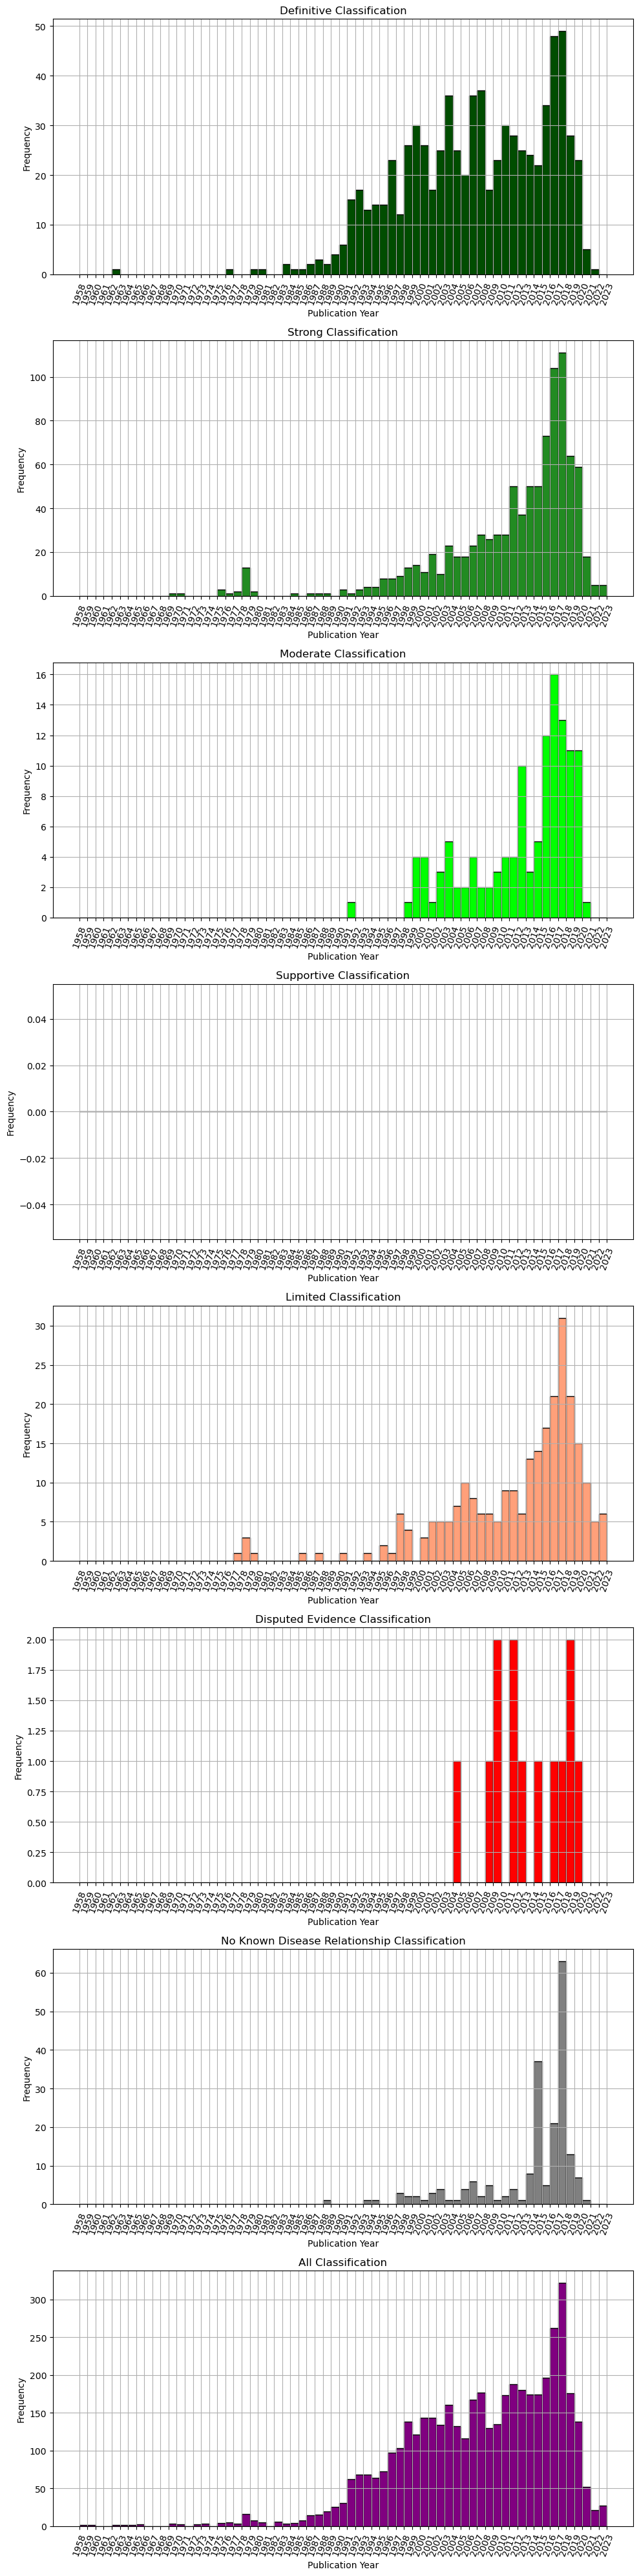

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'pub_year' is numeric
gencc_s_date['pub_year'] = pd.to_numeric(gencc_s_date['pub_year'], errors='coerce')

# Get the minimum and maximum years from the 'pub_year' column
min_year = int(gencc_s_date['pub_year'].min())
max_year = int(gencc_s_date['pub_year'].max()) + 1  # Add 1 to include the maximum year in the range

# Define classifications and their corresponding colors
classifications = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey',
    'All': 'purple'
}

# Create a figure with a subplot for each classification
fig, axs = plt.subplots(len(classifications), 1, figsize=(10, 5*len(classifications)))

# Plot a histogram of the pub_year for each classification
for i, (classification, color) in enumerate(classifications.items()):
    if classification == 'All':
        data = gencc_s_date
    else:
        data = gencc_s_date[gencc_s_date['submitted_as_classification_name'] == classification]
    
    data['pub_year'].hist(ax=axs[i], color=color, bins=range(min_year, max_year), edgecolor='black')
    axs[i].set_title(f'{classification} Classification')
    axs[i].set_xticks(range(min_year, max_year))  # Set x-axis ticks
    axs[i].set_xticklabels(range(min_year, max_year), rotation=70)  # Rotate x-axis labels
    axs[i].set_xlabel('Publication Year')  # Set x-axis label
    axs[i].set_ylabel('Frequency')  # Set y-axis label

plt.tight_layout()
plt.show()

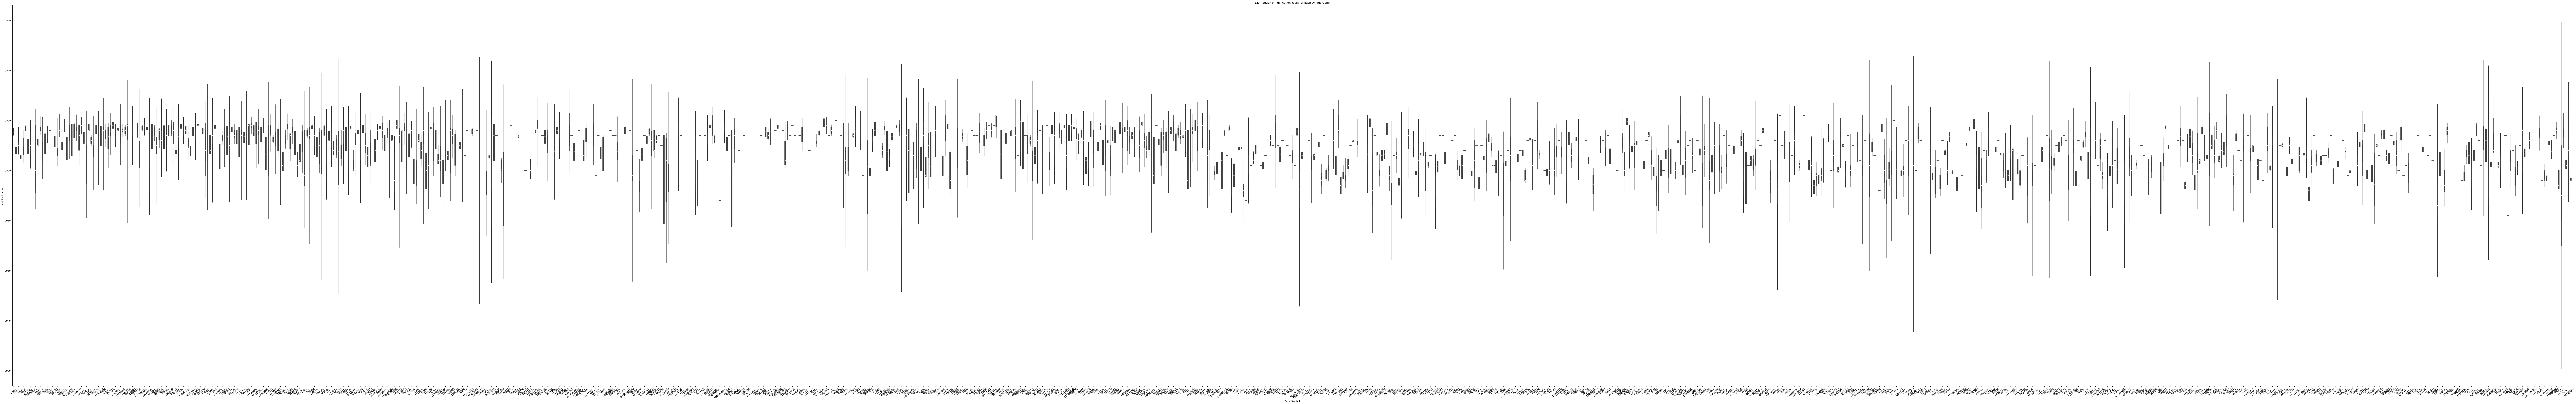

In [9]:
import seaborn as sns

# Create a violin plot
plt.figure(figsize=(200, 30))
sns.violinplot(x='gene_symbol', y='pub_year', data=gencc_s_date)

# Set plot title and labels
plt.title('Distribution of Publication Years for Each Unique Gene')
plt.xlabel('Gene Symbol')
plt.ylabel('Publication Year')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

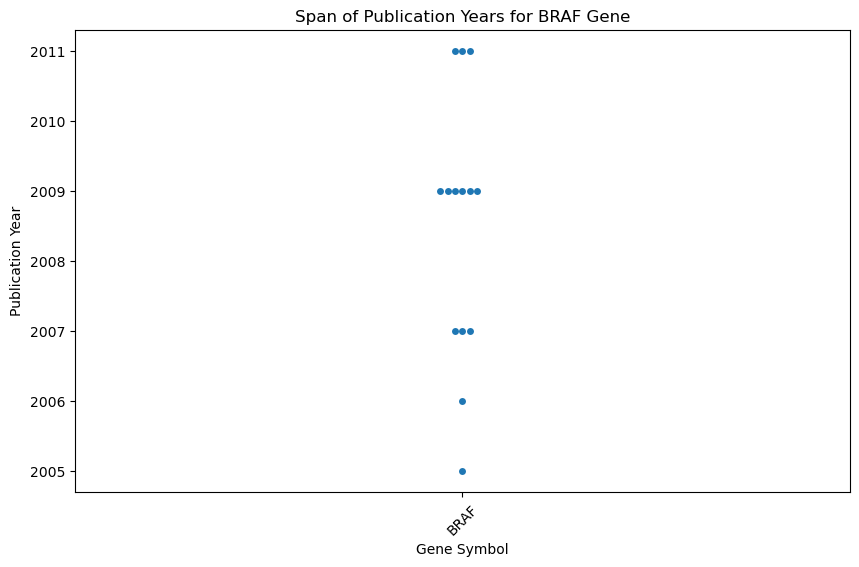

In [5]:
import seaborn as sns

# Filter the DataFrame to only include rows where 'gene_symbol' is 'BRAF'
gencc_s_date_braf = gencc_s_date[gencc_s_date['gene_symbol'] == 'BRAF']

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='gene_symbol', y='pub_year', data=gencc_s_date_braf)

# Set plot title and labels
plt.title('Span of Publication Years for BRAF Gene')
plt.xlabel('Gene Symbol')
plt.ylabel('Publication Year')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

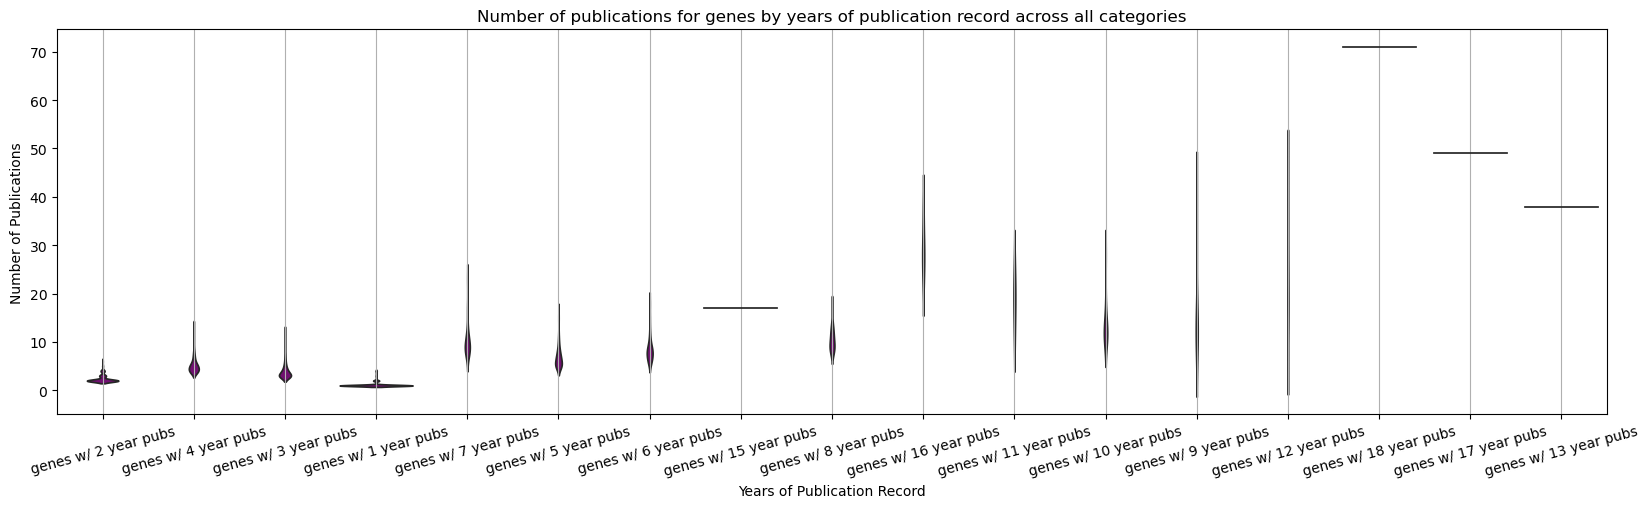

In [2]:
# Calculate the number of years each gene has had publications

grouped_years = gencc_s_date.groupby('gene_symbol')['pub_year'].nunique()

# Calculate the total number of publications for each gene
grouped_publications = gencc_s_date.groupby('gene_symbol').size()

# Combine the two dataframes into one
grouped_df = pd.DataFrame({'years_of_publications': grouped_years, 'number_of_publications': grouped_publications})

# Create a new column 'years_of_publications_label' to use as the x-axis in the plot
grouped_df['years_of_publications_label'] = 'genes w/ ' + grouped_df['years_of_publications'].astype(str) + ' year pubs'

# Create violin plot
plt.figure(figsize=(20, 5))
sns.violinplot(x='years_of_publications_label', y='number_of_publications', data=grouped_df, inner=None, color = "purple")

plt.xticks(rotation=15)
plt.xlabel('Years of Publication Record')
plt.ylabel('Number of Publications')
plt.title("Number of publications for genes by years of publication record across all categories")
plt.grid(axis='x')

plt.show()

In [4]:
grouped_df

,years_of_publications,number_of_publications,years_of_publications_label
gene_symbol,,,
A2ML1,2,3,genes w/ 2 year pubs
AAAS,4,5,genes w/ 4 year pubs
AADAC,3,3,genes w/ 3 year pubs
AAGAB,4,7,genes w/ 4 year pubs
AASS,4,5,genes w/ 4 year pubs
...,...,...,...
ZNF385A,1,1,genes w/ 1 year pubs
ZNF462,4,4,genes w/ 4 year pubs
ZNF565,1,1,genes w/ 1 year pubs


In [74]:

grouped_df[grouped_df['years_of_publications'] == 'BRAF']

grouped_years = df.groupby('gene_symbol')['pub_year'].nunique()

# Calculate the total number of publications for each gene
grouped_publications = df.groupby('gene_symbol').size()

# Combine the two dataframes into one
grouped_df = pd.DataFrame({'years_of_publications': grouped_years, 'number_of_publications': grouped_publications})

# Create a new column 'years_of_publications_label' to use as the x-axis in the plot
grouped_df['years_of_publications_label'] = 'genes w/ ' + grouped_df['years_of_publications'].astype(str) + ' year pubs'

,years_of_publications,number_of_publications,years_of_publications_label
gene_symbol,,,
A2ML1,2,3,genes with 2 year publication record
AAAS,4,5,genes with 4 year publication record
AADAC,3,3,genes with 3 year publication record
AAGAB,4,7,genes with 4 year publication record
AASS,4,5,genes with 4 year publication record
...,...,...,...
ZNF385A,1,1,genes with 1 year publication record
ZNF462,4,4,genes with 4 year publication record
ZNF565,1,1,genes with 1 year publication record


KeyError: 'years_of_publications_label'

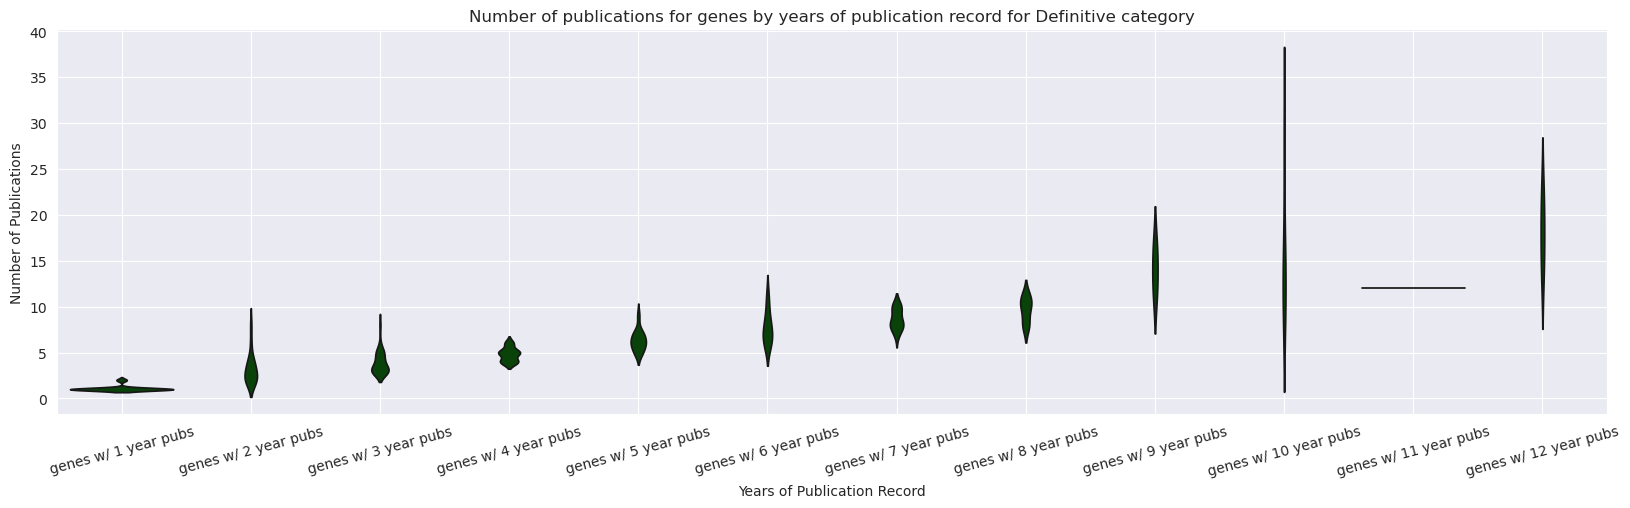

In [14]:
classifications = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey',
    'All': 'purple'
}

sns.set_style("darkgrid")

for classification, color in classifications.items():
    if classification == 'All':
        df = gencc_s_date
    else:
        df = gencc_s_date[gencc_s_date['submitted_as_classification_name'] == classification]
    
    # Calculate the number of years each gene has had publications
    grouped_years = df.groupby('gene_symbol')['pub_year'].nunique()

    # Calculate the total number of publications for each gene
    grouped_publications = df.groupby('gene_symbol').size()

    # Combine the two dataframes into one
    grouped_df = pd.DataFrame({'years_of_publications': grouped_years, 'number_of_publications': grouped_publications})

    # Create a new column 'years_of_publications_label' to use as the x-axis in the plot
    grouped_df['years_of_publications_label'] = 'genes w/ ' + grouped_df['years_of_publications'].astype(str) + ' year pubs'

    # Create violin plot
    plt.figure(figsize=(20, 5))
    order = sorted(grouped_df['years_of_publications_label'].unique(), key=lambda x: int(x.split(' ')[2]))
    sns.violinplot(x='years_of_publications_label', y='number_of_publications', data=grouped_df, inner=None, color=color, order=order)

    plt.xticks(rotation=15)
    plt.xlabel('Years of Publication Record')
    plt.ylabel('Number of Publications')
    plt.title(f"Number of publications for genes by years of publication record for {classification} category")
    plt.grid(axis='x')

    # Add count of data points for each violin
    gene_counts = df.groupby('years_of_publications_label')['gene_symbol'].nunique()
    for i, label in enumerate(order):
        count = gene_counts[label]
        plt.text(i, grouped_df['number_of_publications'].max(), f'n={count}', ha='center', va='bottom')  # adjust y-coordinate as needed

    plt.show()

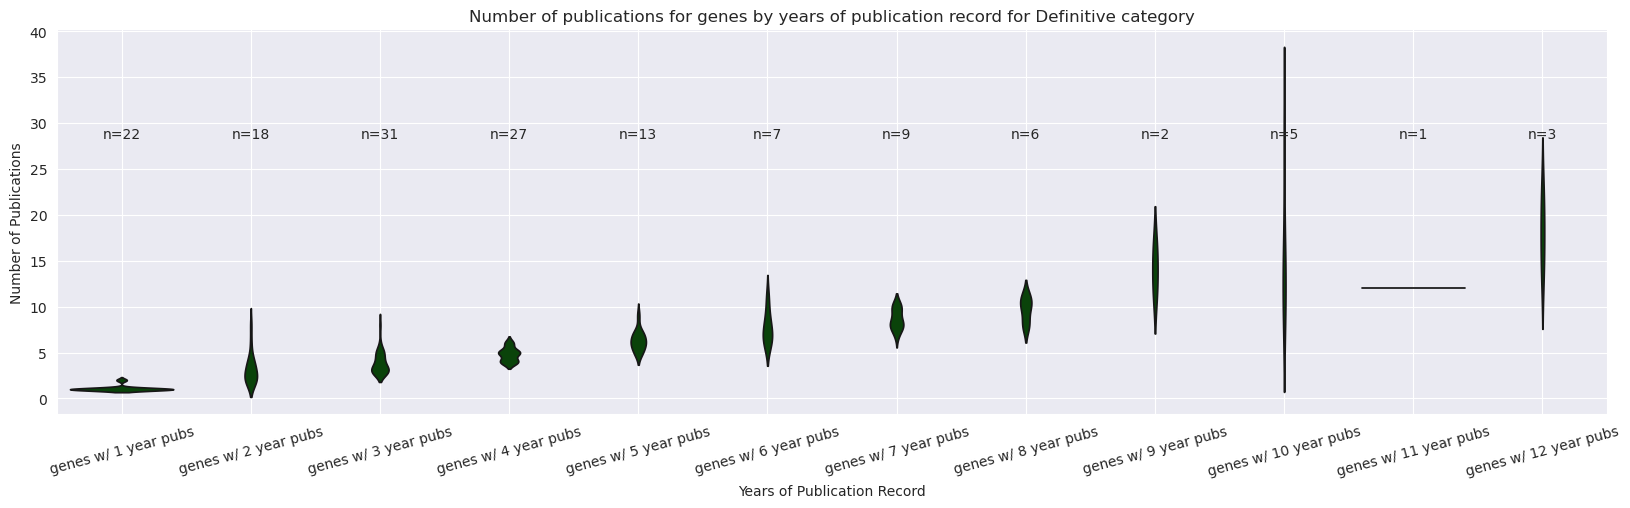

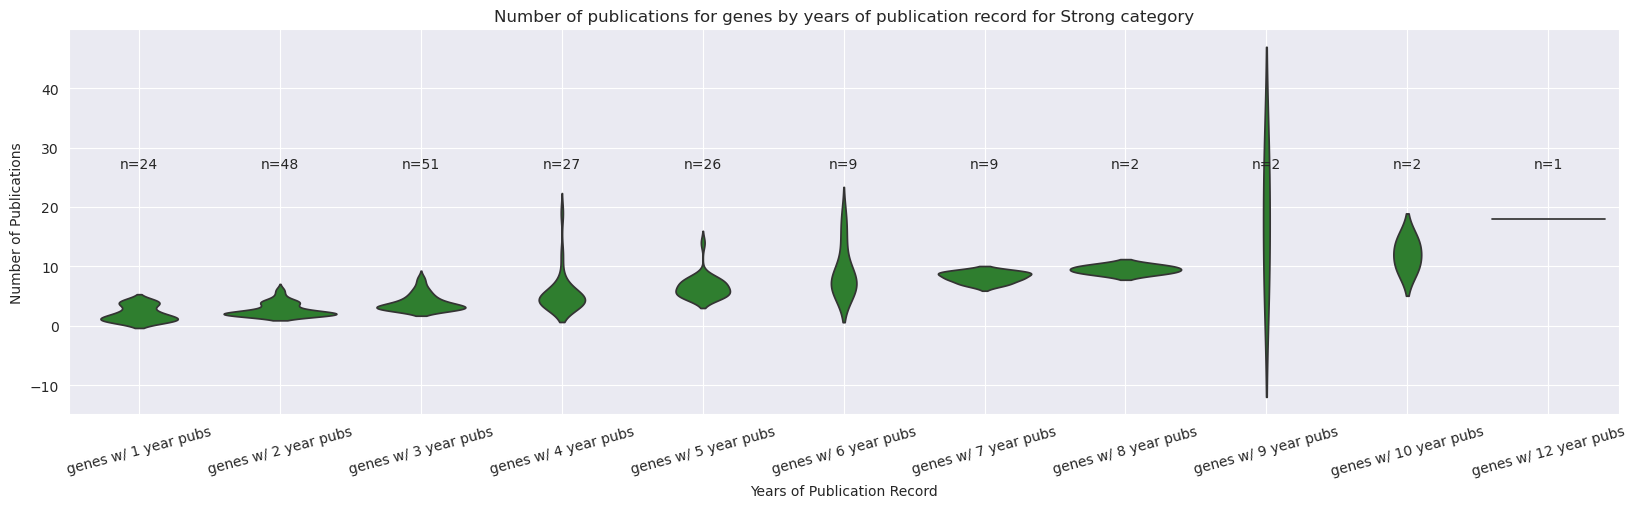

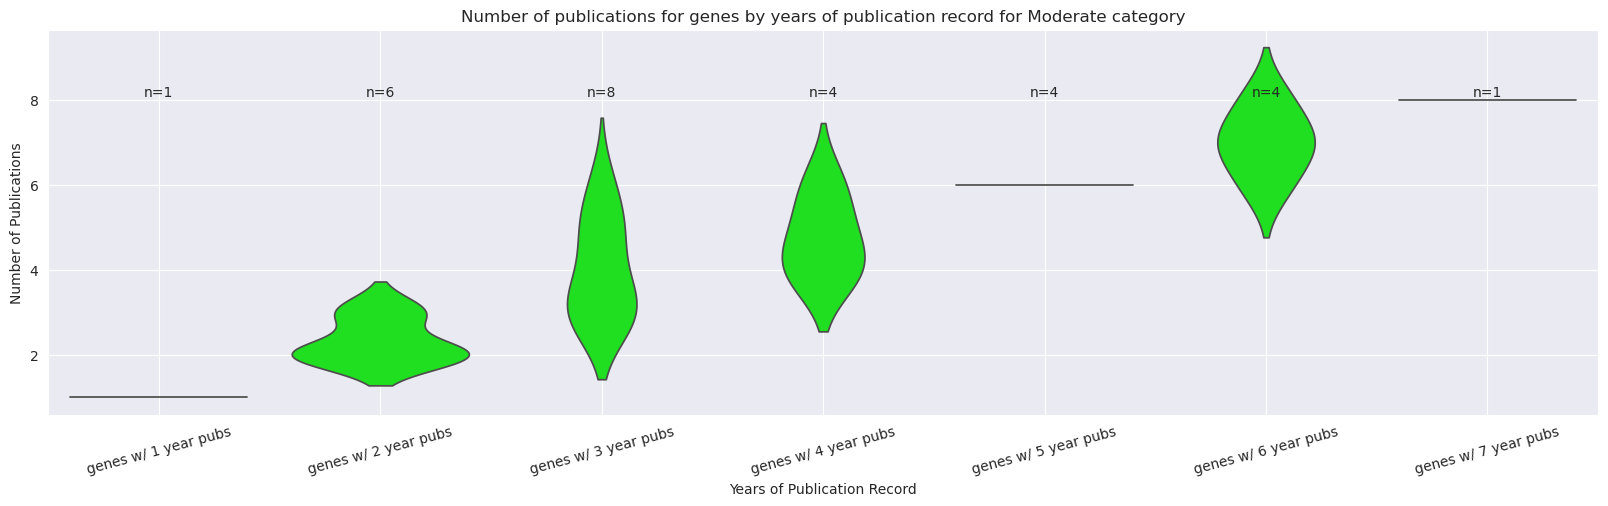

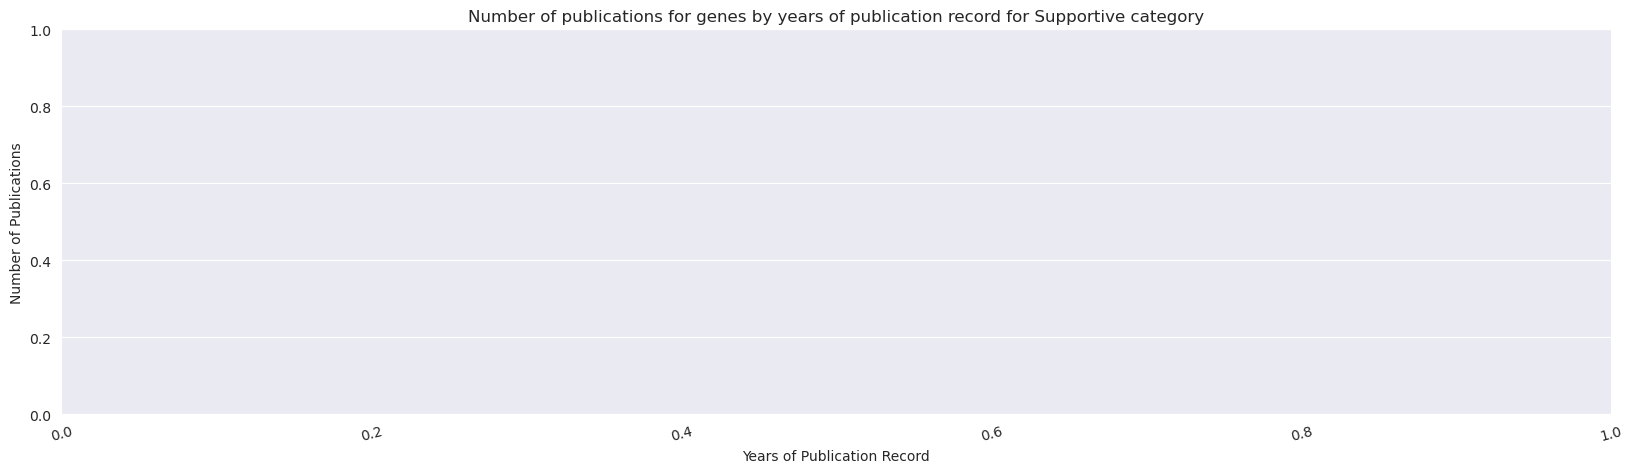

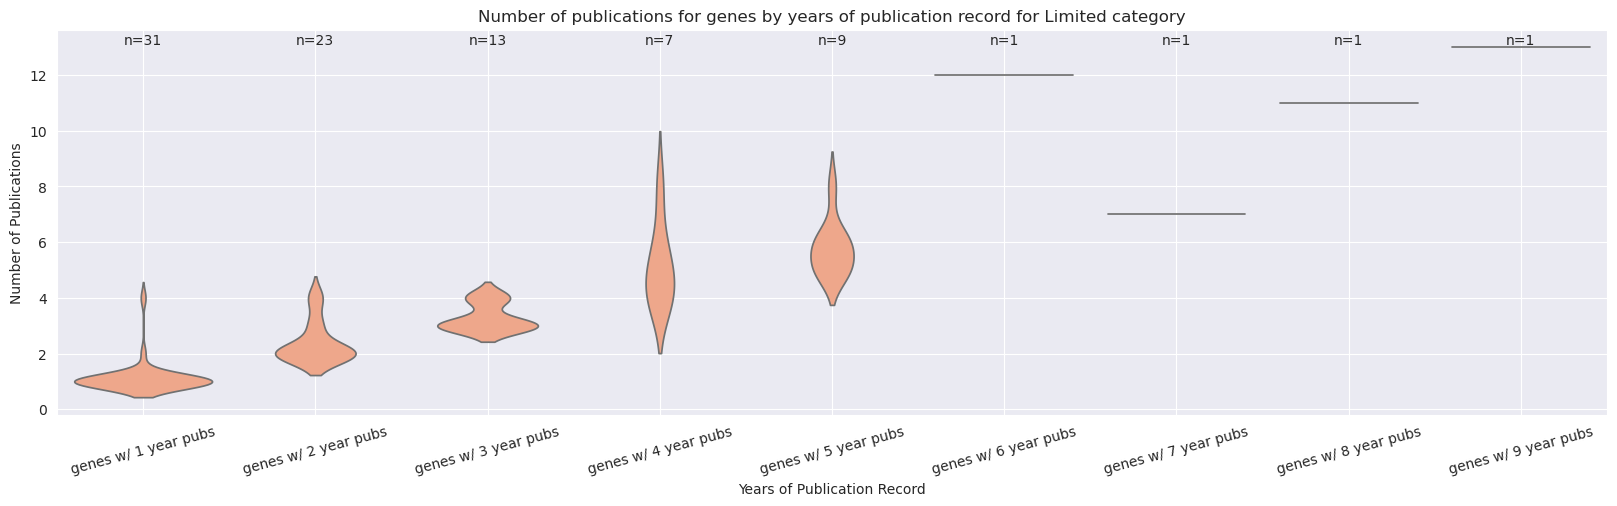

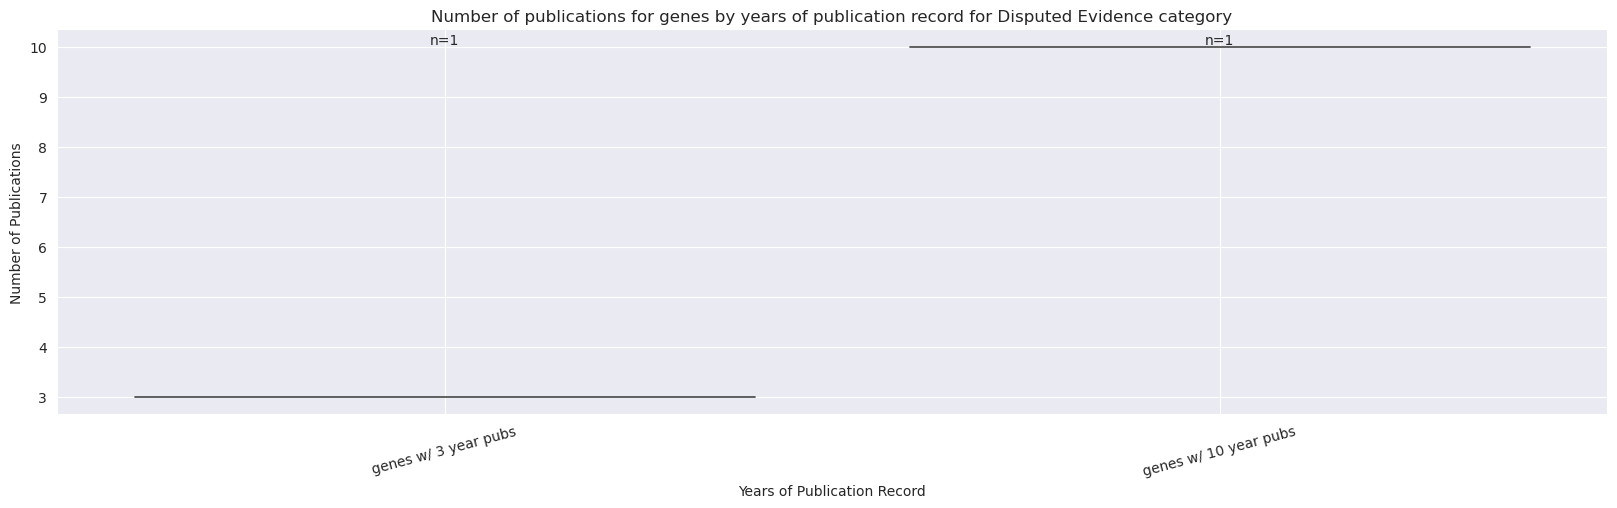

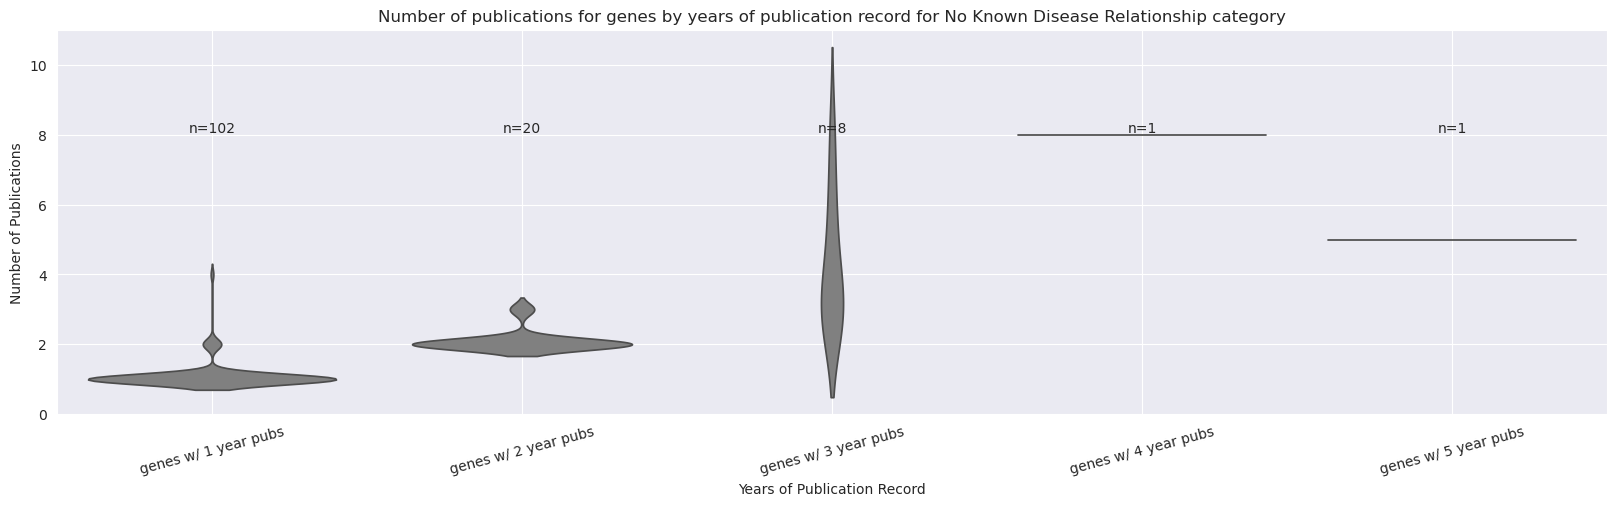

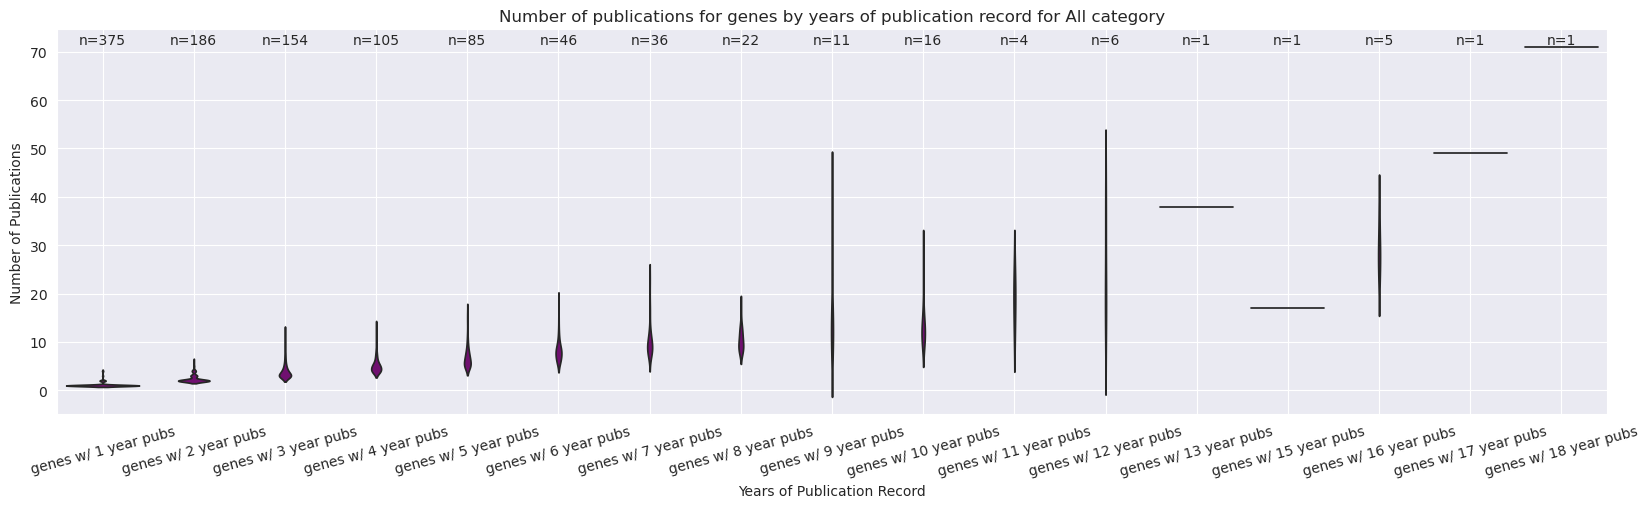

In [15]:
classifications = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey',
    'All': 'purple'
}
sns.set_style("darkgrid")

for classification, color in classifications.items():
    if classification == 'All':
        df = gencc_s_date
    else:
        df = gencc_s_date[gencc_s_date['submitted_as_classification_name'] == classification]
    
    # Calculate the number of years each gene has had publications
    grouped_years = df.groupby('gene_symbol')['pub_year'].nunique()

    # Calculate the total number of publications for each gene
    grouped_publications = df.groupby('gene_symbol').size()

    # Combine the two dataframes into one
    grouped_df = pd.DataFrame({'years_of_publications': grouped_years, 'number_of_publications': grouped_publications})

    # Create a new column 'years_of_publications_label' to use as the x-axis in the plot
    grouped_df['years_of_publications_label'] = 'genes w/ ' + grouped_df['years_of_publications'].astype(str) + ' year pubs'

    # Create violin plot
    plt.figure(figsize=(20, 5))
    order = sorted(grouped_df['years_of_publications_label'].unique(), key=lambda x: int(x.split(' ')[2]))
    sns.violinplot(x='years_of_publications_label', y='number_of_publications', data=grouped_df, inner=None, color=color, order=order)

    plt.xticks(rotation=15)
    plt.xlabel('Years of Publication Record')
    plt.ylabel('Number of Publications')
    plt.title(f"Number of publications for genes by years of publication record for {classification} category")
    plt.grid(axis='x')

    # Add count of data points for each violin
    counts = grouped_df['years_of_publications_label'].value_counts().loc[order]
    for i, count in enumerate(counts):
        plt.text(i, grouped_df['number_of_publications'].max(), f'n={count}', ha='center', va='bottom')  # adjust y-coordinate as needed

    plt.show()